# BANK CUSTOMER CHURN ANALYSIS


This notebook will analyze the possibility of bank customer churn based on insights gathered from the datasets. Insights from personal info such as age, gender, income and demographic location, type of card, products, their credit score and how long the customer has been with the bank. It is advantageous for the bank to know how to retain customer loyalty, rather than looking out for another customer.

[Data Source](https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn)

## IMPORT LIBRARY

Import **psycopg2** for multi-threaded applications and manages its own connection pool, **pandas** for data analysis and manipulation, and **sqlalchemy** to facilitates the communication between Python programs and databases.

In [1]:
import psycopg2
import pandas as pd

In [2]:
!pip install --upgrade 'sqlalchemy<2.0'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 44.1 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.10
    Uninstalling SQLAlchemy-2.0.10:
      Successfully uninstalled SQLAlchemy-2.0.10


In [3]:
from sqlalchemy import create_engine

## DATASET

In [5]:
# Show table from schema

q='''
  
  select table_name
    from information_schema.tables
    where table_schema = 'public'

'''

df = pd.read_sql(q,engine_postgresql)
df

,table_name
0,pg_stat_statements
1,customer_churn_records


In [6]:
# show column in table = customer_churn_records

q='''
  
  SELECT * FROM customer_churn_records

'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,complain,satisfaction_score,card_type,point_earned
0,1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101349.0,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807,1,0,1,112543.0,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660,3,1,0,113932.0,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510,1,1,1,79084.1,0,0,5,GOLD,425


### Dataset Explanation



1.   **RowNumber** : Corresponds to the record (row) number 
2.   **CustomerId** : Customer's id number
3.   **Surname** : Customer's surname
4.   **CreditScore** : Prediction of customer credit behavior
5.   **Geography** : Customer’s location
6.   **Gender** : Customer's gender information
7.   **Age** : Customer's age information
8.   **Tenure** : Number of years the customer has been stay with the bank
9.   **Balance** : Customer's balance information in their account
10.  **NumOfProducts** : Number of products that a customer has purchased
11.  **HasCrCard** : Whether or not a customer has a credit card
12.  **IsActiveMember** : Whether or not a customer is active
13.  **EstimatedSalary** : Customer's estimated salary amount
14.  **Exited** : Whether or not the customer left the bank
15.  **Complain** : Whether customer has complaint or not
16.  **Satisfaction Score** : Customer satisfaction score against the bank
17.  **Card Type** : Type of card hold by the customer
18.  **Points Earned** : Points earned by the customer for using credit card

## ENTITY RELATIONSHIP DIAGRAM

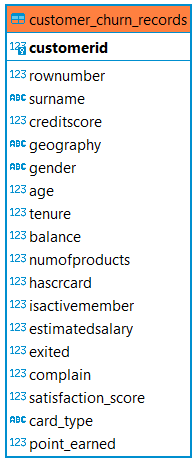


## QUERY

In [7]:
# count total customer that is churn/exited or not 

q='''
  
  WITH temp_churn AS(
    SELECT exited,
    CASE 
       WHEN exited = 1 THEN 'Churn'
       ELSE 'Not Churn'
    END AS STATUS
    from customer_churn_records
    )
  
  SELECT STATUS,
  COUNT(exited) as Total
  FROM temp_churn
  GROUP BY 1

'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,status,total
0,Not Churn,7962
1,Churn,2038


In [8]:
# count how many active customer that churn

q=''' 

  WITH temp_isactivemember AS(
    SELECT exited,
    CASE 
       WHEN isactivemember = 1 THEN 'Active'
       ELSE 'Not Active'
    END AS isactivemember
    from customer_churn_records
    )
  
  SELECT isactivemember,
  COUNT (CASE WHEN exited = 1 THEN 1 END) AS Churn,
  COUNT (CASE WHEN exited = 0 THEN 1 END) AS Not_Churn
  FROM temp_isactivemember
  GROUP BY 1

'''

df = pd.read_sql(q,engine_postgresql)
df

,isactivemember,churn,not_churn
0,Not Active,1303,3546
1,Active,735,4416


In [9]:
# count total customer that is churn/exited or not based on their gender

q='''
  
  SELECT gender,
  COUNT(gender) as Total,
  COUNT(case when exited = 1 then 1 end) as Churn,
  COUNT(case when exited = 0 then 1 end) as Not_churn
  FROM customer_churn_records
  GROUP BY 1

'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,gender,total,churn,not_churn
0,Female,4543,1139,3404
1,Male,5457,899,4558


In [10]:
# count how many customer that churn based on their demographic

q=''' 

  SELECT geography,
  COUNT (CASE WHEN exited = 1 THEN 1 END) AS Churn,
  COUNT (CASE WHEN exited = 0 THEN 1 END) AS Not_Churn
  FROM customer_churn_records
  GROUP BY 1

'''

df = pd.read_sql(q,engine_postgresql)
df

,geography,churn,not_churn
0,Spain,413,2064
1,France,811,4203
2,Germany,814,1695


In [11]:
# count how many customer that churn based on their group age

q=''' 

    SELECT 
    CASE 
        WHEN age <= 20 THEN 'Group <= 20'
        WHEN age >= 21 AND age <= 40 THEN 'Group 21-40'
        WHEN age >= 41 AND age <= 60 THEN 'Group 41-60'
        ELSE 'Group > 60'
    END AS age_category,
    COUNT(CASE WHEN exited = 1 then 1 end) as Churn,
    COUNT(CASE WHEN exited = 0 then 1 end) as Not_Churn
    FROM customer_churn_records
    GROUP BY 1
    ORDER BY 1

'''

df = pd.read_sql(q,engine_postgresql)
df

,age_category,churn,not_churn
0,Group <= 20,5,84
1,Group 21-40,682,5648
2,Group 41-60,1236,1881
3,Group > 60,115,349


In [12]:
# count total customer that is churn/exited or not based on how long 
# they've been as customer

q='''
  
  WITH temp_tenure AS(
    SELECT tenure,
    CASE 
       WHEN exited = 1 THEN 'Churn'
       ELSE 'Not Churn'
    END AS STATUS
    from customer_churn_records
    )
  
  SELECT STATUS,
  AVG(tenure) as Average_tenure
  FROM temp_tenure
  GROUP BY 1
  
'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,status,average_tenure
0,Not Churn,5.032781
1,Churn,4.934740


In [13]:
# count how many customer that churn based on the amount of credit score 
# (average, highest and lowest)

q='''

   WITH temp_creditscore AS(
    SELECT creditscore,
    CASE 
       WHEN exited = 1 THEN 'Churn'
       ELSE 'Not Churn'
    END AS STATUS
    from customer_churn_records
    )
  
  SELECT STATUS,
  AVG(creditscore) as avg_creditscore,
  MAX(creditscore) as max_creditscore,
  MIN(creditscore) as min_creditscore
  FROM temp_creditscore
  GROUP BY 1
  
'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,status,avg_creditscore,max_creditscore,min_creditscore
0,Not Churn,651.837855,850,405
1,Churn,645.414622,850,350


In [14]:
# count how many customer that churn based on how many bank product they use

q='''

   WITH temp_bankprod AS(
    SELECT numofproducts,
    CASE 
       WHEN exited = 1 THEN 'Churn'
       ELSE 'Not Churn'
    END AS STATUS
    from customer_churn_records
    )
  
  SELECT STATUS,
  AVG(numofproducts) as avg_numofproducts
  FROM temp_bankprod
  GROUP BY 1
  
'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,status,avg_numofproducts
0,Not Churn,1.544210
1,Churn,1.475466


In [15]:
# count how many customer that churn based on the average score of customer 
# satisfaction score towards the bank

q='''

   WITH temp_satisfaction AS(
    SELECT satisfaction_score,
    CASE 
       WHEN exited = 1 THEN 'Churn'
       ELSE 'Not Churn'
    END AS STATUS
    from customer_churn_records
    )
  
  SELECT STATUS,
  AVG(satisfaction_score) as satisfaction_level
  FROM temp_satisfaction
  GROUP BY 1
  
'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,status,satisfaction_level
0,Not Churn,3.017960
1,Churn,2.997547


In [16]:
# count how many customer that churn based on the amount of complain filed by customer

q='''

   WITH temp_complain AS(
    SELECT complain,
    CASE 
       WHEN exited = 1 THEN 'Churn'
       ELSE 'Not Churn'
    END AS STATUS
    from customer_churn_records
    )
  
  SELECT STATUS,
  COUNT(complain) as complain
  FROM temp_complain
  GROUP BY 1
  
'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,status,complain
0,Not Churn,7962
1,Churn,2038


In [17]:
# count how many customer that churn based on credit card ownership

q=''' 

    WITH temp_hascrcard AS(
    SELECT hascrcard,
    CASE 
       WHEN exited = 1 THEN 'Churn'
       ELSE 'Not Churn'
    END AS STATUS
    from customer_churn_records
    )
  
  SELECT STATUS,
  COUNT (CASE WHEN hascrcard = 1 THEN 1 END) AS has_creditcard,
  COUNT (CASE WHEN hascrcard = 0 THEN 1 END) AS no_creditcard
  FROM temp_hascrcard
  GROUP BY 1

'''

df = pd.read_sql(q,engine_postgresql)
df

,status,has_creditcard,no_creditcard
0,Not Churn,5630,2332
1,Churn,1425,613


In [18]:
# count how many customer that churn based on the their card type

q='''

   WITH temp_card AS(
    SELECT card_type,
    CASE 
       WHEN exited = 1 THEN 'Churn'
       ELSE 'Not Churn'
    END AS STATUS
    from customer_churn_records
    )
  
  SELECT STATUS,
  COUNT(CASE WHEN card_type = 'PLATINUM' THEN 1 END) as PLATINUM,
  COUNT(CASE WHEN card_type = 'DIAMOND' THEN 1 END) as DIAMOND,
  COUNT(CASE WHEN card_type = 'GOLD' THEN 1 END) as GOLD,
  COUNT(CASE WHEN card_type = 'SILVER' THEN 1 END) as SILVER
  FROM temp_card
  GROUP BY 1
  
'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,status,platinum,diamond,gold,silver
0,Not Churn,1987,1961,2020,1994
1,Churn,508,546,482,502


In [19]:
# count how many customer that churn based on the amount of point customer earned

q='''

   WITH temp_point AS(
    SELECT point_earned,
    CASE 
       WHEN exited = 1 THEN 'Churn'
       ELSE 'Not Churn'
    END AS STATUS
    from customer_churn_records
    )
  
  SELECT STATUS,
  AVG(point_earned) as avg_point,
  MAX(point_earned) as max_point,
  MIN(point_earned) as min_point
  FROM temp_point
  GROUP BY 1
  
'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,status,avg_point,max_point,min_point
0,Not Churn,607.044084,1000,119
1,Churn,604.448479,1000,163


In [20]:
# count how many customer that churn based on customer estimated salary

q='''

   WITH temp_salary AS(
    SELECT estimatedsalary,
    CASE 
       WHEN exited = 1 THEN 'Churn'
       ELSE 'Not Churn'
    END AS STATUS
    from customer_churn_records
    )
  
  SELECT STATUS,
  AVG(estimatedsalary) as avg_salary,
  MAX(estimatedsalary) as max_salary,
  MIN(estimatedsalary) as min_salary
  FROM temp_salary
  GROUP BY 1
  
'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,status,avg_salary,max_salary,min_salary
0,Not Churn,99726.853103,199992.0,90.07
1,Churn,101509.908819,199808.0,11.58


In [21]:
# count how many customer that churn based on the amount of customer's bank balance
# (average, highest, lowest)

q='''

   WITH temp_balance AS(
    SELECT balance,
    CASE 
       WHEN exited = 1 THEN 'Churn'
       ELSE 'Not Churn'
    END AS STATUS
    from customer_churn_records
    )
  
  SELECT STATUS,
  AVG(balance) as avg_balance,
  MAX(balance) as max_balance,
  MIN(balance) as min_balance
  FROM temp_balance
  GROUP BY 1
  
'''

df = pd.read_sql(q,engine_postgresql)
df.head()

,status,avg_balance,max_balance,min_balance
0,Not Churn,72742.446747,221532,0
1,Churn,91109.104024,250898,0


## CONCLUSION

Based on above **QUERY**, there are some category that can help us identify what aspects that really affected customer to **churn**. Eventhough, customer that already stay quite long, can still **churn**, or customer that has, let's say, fairly amount of saving on their bank account, can still **churn**.

Customer in the age category between **41 to 60**, are more likely to churn than any other age category. To fix this problem, bank can focused on creating or enhancing their product and services that can help attract and maintain customer in certain age category, like smoother service with minimum queue time for older customer.

Customer who **has credit card** tends to not churn and stay with the bank. It probably best for the bank to convince more customer to apply for credit cards with various promotion, that depends on customer segmentation, which can be based on their **type of card** [ Diamond, Platinum, Gold, Silver ], **gender**, **age**, **expenses**, and **demographic location**.

Satisfaction score from customer who stay and churn is a little alarming [ 3.017960 / 2.997547 ]. Bank need to evaluate, to keep the satisfaction score between churn customer and customer who stay, at distance, and keep active customer which is less likely to churn.